In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
import numpy as np

In [2]:
df = pd.read_csv("yawn_features_final.csv")
df.head()

,subject_id,mar_mean,mar_max,mar_std,label
0,no_yawn_1,0.053303,0.179509,0.058467,0
1,no_yawn_10,0.080693,0.214398,0.043297,0
2,no_yawn_11,0.027227,0.038065,0.007924,0
3,no_yawn_12,0.050905,0.068027,0.009067,0
4,no_yawn_13,0.016059,0.022436,0.004218,0


In [3]:
# Pisahkan antara fitur (X) dan label (y)
X = df.drop(columns=['label', 'subject_id'])
y = df['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% dari data akan menjadi test set
    random_state=42,
    stratify=y
)

print("\nDataset berhasil dibagi:")
print(f"  - Ukuran Train Set : {len(X_train)} sampel ({len(X_train)/len(df):.0%})")
print(f"  - Ukuran Test Set  : {len(X_test)} sampel ({len(X_test)/len(df):.0%})")


Dataset berhasil dibagi:
  - Ukuran Train Set : 168 sampel (80%)
  - Ukuran Test Set  : 43 sampel (20%)


In [5]:
# Lakukan penskalaan fitur. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Gunakan scaler yang sama dari data train

In [6]:
print("\ntrain model Support Vector Machine (SVM)")
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("Model SVM berhasil dilatih")


train model Support Vector Machine (SVM)
Model SVM berhasil dilatih



             LAPORAN PERFORMA MODEL SVM             

>> Akurasi Model pada Test Set: 100.00%

>> Skor AUC (Area Under Curve): 1.0000

>> Laporan Klasifikasi:
              precision    recall  f1-score   support

     no_yawn       1.00      1.00      1.00        19
        yawn       1.00      1.00      1.00        24

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

>> Confusion Matrix:
[[19  0]
 [ 0 24]]




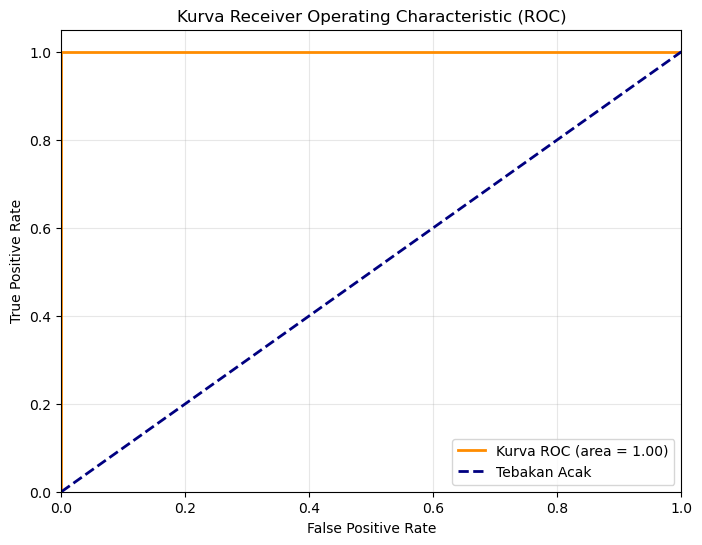


Membuat pair plot...
Pair plot selesai dibuat dan disimpan sebagai 'pair_plot.png'.


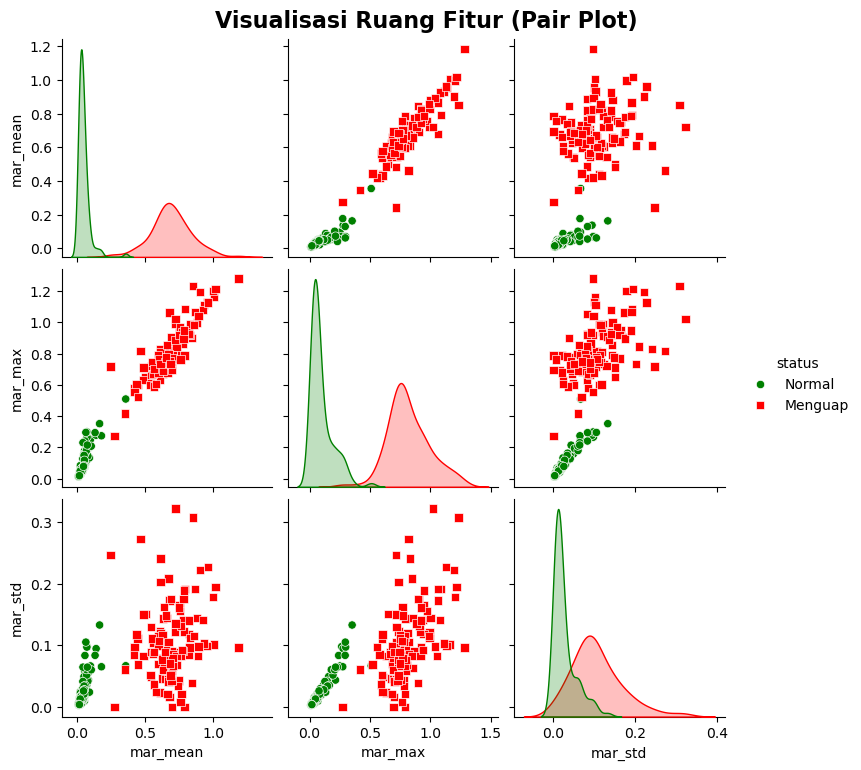


Melatih model SVM dan membuat plot decision boundary...
Plot decision boundary selesai dibuat dan disimpan sebagai 'svm_decision_boundary.png'.


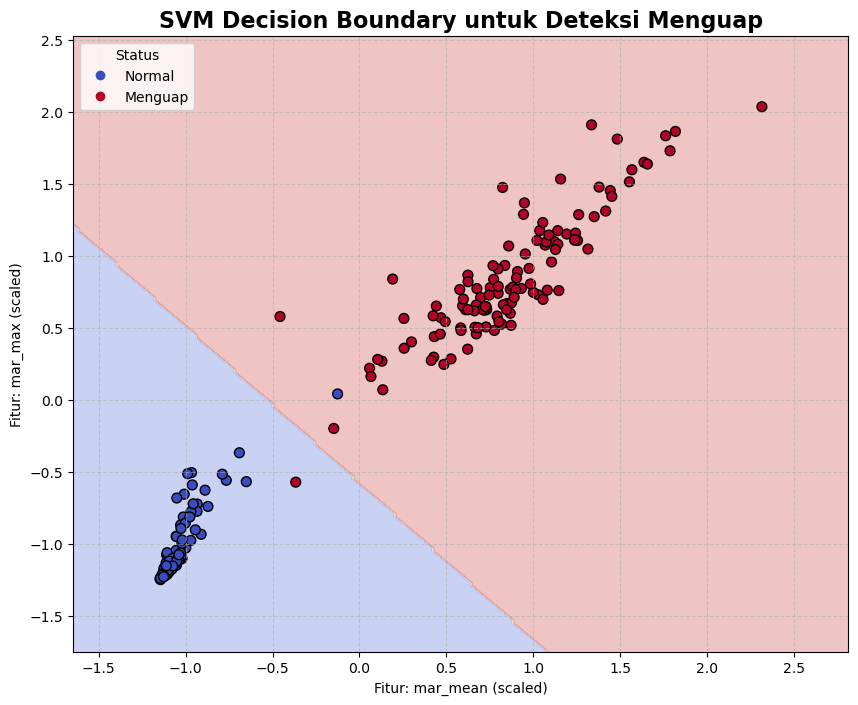

In [ ]:
y_pred_class = svm_model.predict(X_test_scaled)

y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("\n======================================================")
print("             LAPORAN PERFORMA MODEL SVM             ")
print("======================================================")

accuracy = accuracy_score(y_test, y_pred_class)
print(f"\n>> Akurasi Model pada Test Set: {accuracy * 100:.2f}%\n")
print(f">> Skor AUC (Area Under Curve): {roc_auc:.4f}\n")

print(">> Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_class, target_names=['no_yawn', 'yawn']))

print(">> Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class)
print(cm)
print("\n======================================================\n")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Kurva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

df['status'] = df['label'].apply(lambda x: 'Menguap' if x == 1 else 'Normal')
print("\nMembuat pair plot...")
feature_columns = ['mar_mean', 'mar_max', 'mar_std']
g = sns.pairplot(
    df,
    hue='status',
    vars=feature_columns,
    palette={'Normal': 'green', 'Menguap': 'red'},
    markers=["o", "s"]
)
g.fig.suptitle("Visualisasi Ruang Fitur (Pair Plot)", y=1.02, fontsize=16, fontweight='bold')
plt.savefig("pair_plot.png")
print("Pair plot selesai dibuat dan disimpan sebagai 'pair_plot.png'.")
plt.show()

print("\nMelatih model SVM dan membuat plot decision boundary...")

features_for_svm = ['mar_mean', 'mar_max']
X_svm = df[features_for_svm]
y_svm = df['label']

# Scaling fitur untuk SVM
scaler_svm = StandardScaler()
X_svm_scaled = scaler_svm.fit_transform(X_svm)

# Melatih model SVM baru dengan kernel linear untuk visualisasi
svm_model_vis = SVC(kernel='linear')
svm_model_vis.fit(X_svm_scaled, y_svm)

x_min, x_max = X_svm_scaled[:, 0].min() - 0.5, X_svm_scaled[:, 0].max() + 0.5
y_min, y_max = X_svm_scaled[:, 1].min() - 0.5, X_svm_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
scatter = plt.scatter(X_svm_scaled[:, 0], X_svm_scaled[:, 1], c=y_svm, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

plt.title('SVM Decision Boundary untuk Deteksi Menguap', fontsize=16, fontweight='bold')
plt.xlabel(f'Fitur: {features_for_svm[0]} (scaled)')
plt.ylabel(f'Fitur: {features_for_svm[1]} (scaled)')

handles, _ = scatter.legend_elements()
labels = ['Normal', 'Menguap']
plt.legend(handles, labels, title="Status")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("svm_decision_boundary.png")
print("Plot decision boundary selesai dibuat dan disimpan sebagai 'svm_decision_boundary.png'.")
plt.show()